# Adding Signals

In [1]:
import sys
sys.path.append("..")

In [2]:
from scipy.io import wavfile
import scipy.signal as sps 
import wave
import numpy as np
import soundfile
from feature_generation import extract_spectrogram
import matplotlib.pyplot as plt
import specdisplay

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

In [3]:
new_rate = 16000
path = "/home/romulo/Downloads/449487__4177569399__group-talking.wav"

In [5]:
# Read file
#sampling_rate, data = wavfile.read(path)
data, sampling_rate = soundfile.read(path)
# Resample data
data_new = sps.decimate(data,3)
#number_of_samples = round(len(data) * float(new_rate) / sampling_rate)
#data = sps.resample(data, number_of_samples)

In [6]:
data.shape

(1107072,)

In [7]:
data_new.shape

(369024,)

In [8]:
sampling_rate

48000

In [9]:
filename = "/home/romulo/Downloads/resampled_449487__4177569399__group-talking.wav"
wavfile.write(filename, new_rate, data_new)

# Merging two files!

In [10]:
background_noise, bl_sample_rate = soundfile.read(filename)

In [23]:
fall_sound_file = "../samples/random_sample_id_1553823560.014393.wav"
fall_sound, fall_sample_rate = soundfile.read(fall_sound_file)

In [24]:
fall_sample_rate == bl_sample_rate

True

In [25]:
np.squeeze(fall_sound[:,:1]).shape

(63959,)

In [26]:
background_noise[:fall_sound.shape[0]].shape

(63959,)

In [27]:
import scipy

In [81]:
#multichannel
#c = scipy.vstack((np.squeeze(fall_sound[:,:1]),0.1*background_noise[:fall_sound.shape[0]]))
#add
#c = np.add(np.squeeze(fall_sound[:,:1]),0.1*background_noise[:fall_sound.shape[0]])/2
#avg
#c = np.add(np.squeeze(fall_sound[:,:1]),0.1*background_noise[:fall_sound.shape[0]])/2
#max pool
c = np.maximum(np.squeeze(fall_sound[:,:1]),0.1*background_noise[:fall_sound.shape[0]])

In [82]:
c.T.shape

(63959,)

In [83]:
c_filename = "/home/romulo/Downloads/combined_449487__4177569399__group-talking.wav"
wavfile.write(c_filename, fall_sample_rate, c.T)

# Combined Spectrogram!

## ENSURE COLOR SCALE AMPLITUDE OF SPEC IS PRESERVED!

PResumed problem with: def power_to_db(S, ref=1.0, amin=1e-10, top_db=80.0):

In [84]:
combined_sound, fall_sample_rate = soundfile.read(c_filename)

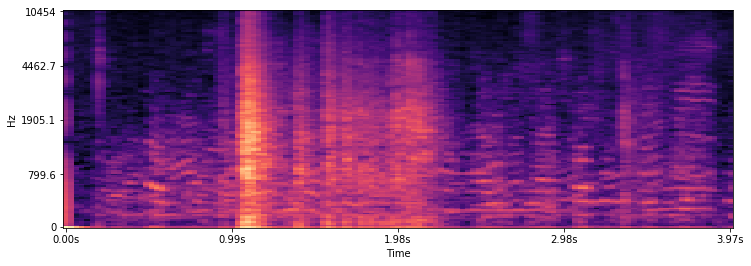

In [91]:
log_s = extract_spectrogram(combined_sound,fall_sample_rate)
#new plot
fig = plt.figure(figsize=(12,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#fig.add_axes(ax)
#getting spectrogram
specdisplay.specshow(log_s, sr=fall_sample_rate, x_axis='time', y_axis='mel')
plt.show()

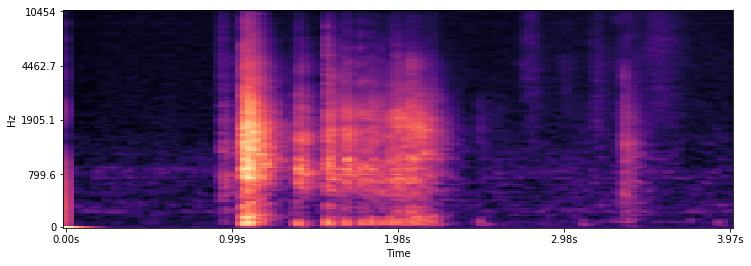

In [90]:
log_s = extract_spectrogram(fall_sound,fall_sample_rate)
#new plot
fig = plt.figure(figsize=(12,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#fig.add_axes(ax)
#getting spectrogram
specdisplay.specshow(log_s, sr=fall_sample_rate, x_axis='time', y_axis='mel')
plt.show()

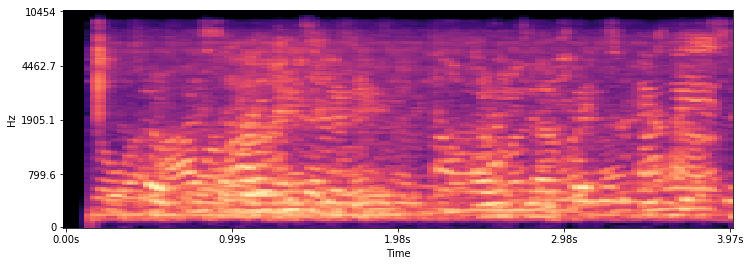

In [94]:
log_s = extract_spectrogram(0.1*background_noise[:fall_sound.shape[0]],fall_sample_rate)
#new plot
fig = plt.figure(figsize=(12,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#fig.add_axes(ax)
#getting spectrogram
specdisplay.specshow(log_s, sr=fall_sample_rate, x_axis='time', y_axis='mel')
plt.show()